In [1]:
import numpy as np
import pandas as pd

import re

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
df_HC600_HYPERFIRE = pd.read_csv('exifdata_HF2_PRO_COVERT_1.csv')

/Users/usmanrizwan/.virtualenvs/RPA/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13,15,16,20,23,26,33,37,38,40,45,46,49,50,51,52,65,70,71,72,73,75,76,77,78,89,90,91,92,93) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
def fixname(x):
    if '/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-RAP1 (Rapperswill)/SD#1 (DEC 18, 2020 - AUG 03, 2020)/' in x:
        x = x.replace('/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-RAP1 (Rapperswill)/SD#1 (DEC 18, 2020 - AUG 03, 2020)/', 
                 '/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-RAP1 (Rapperswill)/SD#1 (DEC 18, 2019 - AUG 03, 2020)/')

    return x

df_HC600_HYPERFIRE['SourceFile'] = df_HC600_HYPERFIRE['SourceFile'].apply(lambda x: fixname(x))

In [5]:
df_HC600_HYPERFIRE[df_HC600_HYPERFIRE['SourceFile'].str.contains('EDAL-D03-RAP1')]['SourceFile'].iloc[0]

'/mnt/wildlife/wildlifemontoringprogram/EDAL-D03-RAP1 (Rapperswill)/SD#1 (DEC 18, 2019 - AUG 03, 2020)/EDALD03RAP1_D1_RCNX0001.JPG'

In [6]:
# df_HC600_HYPERFIRE = pd.read_csv('exifdata_HF2_PRO_COVERT_1.csv')

#Remove Best of Folder

print(len(df_HC600_HYPERFIRE))
df_HC600_HYPERFIRE = df_HC600_HYPERFIRE[~df_HC600_HYPERFIRE['Directory'].str.contains("Best of CoE wildlife photos")]
print(len(df_HC600_HYPERFIRE))

def convertToInt(x):
    h = re.findall(r'\d+', x.split('_')[-1])
    if len(h) == 0:
        print(x)
    return int(h[0])

df_HC600_HYPERFIRE['image_number'] = df_HC600_HYPERFIRE['FileName'].apply(lambda x: convertToInt(x))

# df_HC600_HYPERFIRE['image_number'] = df_HC600_HYPERFIRE['FileName'].apply(lambda x: 
#                                                                           re.findall(r'\d+', x.split('_')[-1])[0])

print(len(df_HC600_HYPERFIRE))

df_ai_results = pd.read_csv('ml_results.csv')
print(len(df_ai_results))

144922
144921
144921


/Users/usmanrizwan/.virtualenvs/RPA/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1203908


In [7]:
df_HC600_HYPERFIRE['Model'].unique()

array(['HF2 PRO COVERT', '119327', 119327], dtype=object)

In [8]:
df_HC600_HYPERFIRE.groupby('Model').size()

Model
119327            32768
119327            39083
HF2 PRO COVERT    73070
dtype: int64

In [9]:
df_HC600_HYPERFIRE[df_HC600_HYPERFIRE.Model == 'HF2 PRO COVERT'].FileName

1         EDALA04HOH1_D10_RCNX0001.JPG
2         EDALA04HOH1_D10_RCNX0002.JPG
3         EDALA04HOH1_D10_RCNX0003.JPG
4         EDALA04HOH1_D10_RCNX0004.JPG
5         EDALA04HOH1_D10_RCNX0005.JPG
                      ...             
144917     EDALD03RAP1_D1_RCNX2656.JPG
144918     EDALD03RAP1_D1_RCNX2657.JPG
144919     EDALD03RAP1_D1_RCNX2658.JPG
144920     EDALD03RAP1_D1_RCNX2659.JPG
144921     EDALD03RAP1_D1_RCNX2660.JPG
Name: FileName, Length: 73070, dtype: object

In [10]:
df_HC600_HYPERFIRE[df_HC600_HYPERFIRE['SourceFile'].str.contains('EDAL-D03-RAP1')]

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,ImageDescription,Make,Model,Orientation,XResolution,YResolution,ResolutionUnit,Software,ModifyDate,YCbCrPositioning,Copyright,ExposureTime,FNumber,ExposureProgram,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,CompressedBitsPerPixel,ShutterSpeedValue,ApertureValue,ExposureCompensation,MaxApertureValue,MeteringMode,LightSource,Flash,Warning,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,RelatedSoundFile,InteropIndex,InteropVersion,ExposureIndex,SensingMethod,FileSource,SceneType,Compression,ThumbnailOffset,ThumbnailLength,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,Aperture,ImageSize,Megapixels,ShutterSpeed,ThumbnailImage,LightValue,TimeZoneOffset,FileNumber,DirectoryNumber,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,DayOfWeek,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,Contrast,Brightness,Sharpness,Saturation,AmbientInfrared,AmbientLight,MotionSensitivity,BatteryVoltage,BatteryVoltageAvg,BatteryType,UserLabel,SerialNumber,ExposureMode,WhiteBalance,SceneCaptureType,image_number
142262,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,12.05,EDALD03RAP1_D1_RCNX0001.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,129 kB,2020:09:02 00:40:55-06:00,2020:09:02 00:40:55-06:00,2020:09:02 00:40:55-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",NaN,RECONYX,HF2 PRO COVERT,NaN,72,72,inches,NaN,2019:12:18 10:20:32,Co-sited,NaN,1/66,NaN,NaN,200,220,2019:12:18 10:20:32,2019:12:18 10:20:32,"Y, Cb, Cr, -",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,NaN,100,sRGB,2048,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2048,1440,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),NaN,2048x1440,2.9,1/66,NaN,NaN,0.0,1.0,100.0,1.4a,2019:07:31,Motion Detection,1 of 3,1.0,Thursday,Last Quarter,50 F,10 C,128.0,0.0,64.0,128.0,299.0,1016.0,90.0,9096.0,9477.0,1.0,EDAL-D03-RAP1,HLPXEM05041534,Auto,Manual,Standard,1
142263,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,12.05,EDALD03RAP1_D1_RCNX0002.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,669 kB,2020:09:02 00:40:56-06:00,2020:09:02 00:40:56-06:00,2020:09:02 00:40:56-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",NaN,RECONYX,HF2 PRO COVERT,NaN,72,72,inches,NaN,2019:12:18 12:49:03,Co-sited,NaN,1/505,NaN,NaN,100,220,2019:12:18 12:49:03,2019:12:18 12:49:03,"Y, Cb, Cr, -",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,NaN,100,sRGB,2048,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2048,1440,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),NaN,2048x1440,2.9,1/505,NaN,NaN,0.0,2.0,100.0,1.4a,2019:07:31,Motion Detection,1 of 3,2.0,Thursday,Last Quarter,25 F,-4 C,128.0,0.0,64.0,128.0,2333.0,6880.0,90.0,8797.0,8797.0,1.0,EDAL-D03-RAP1,HLPXEM05041534,Auto,Manual,Standard,2
142264,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,12.05,EDALD03RAP1_D1_RCNX0003.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,669 kB,2020:09:02 00:40:56-06:00,2020:09:02 00:40:56-06:00,2020:09:02 00:40:56-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",NaN,RECONYX,HF2 PRO COVERT,NaN,72,72,inches,NaN,2019:12:18 12:49:04,Co-sited,NaN,1/505,NaN,NaN,100,220,2019:12:18 12:49:04,2019:12:18 12:49:04,"Y, Cb, Cr, -",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,NaN,100,sRGB,2048,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2048,1440,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),NaN,2048x1440,2.9,1/505,NaN,NaN,0.0,3.0,100.0,1.4a,2019:07:31,Motion Detection,2 of 3,2.0,Thursday,Last Quarter,25 F,-4 C,128.0,0.0,64.0,128.0,2333.0,6880.0,90.0,8780.0,8797.0,1.0,EDAL-D03-RAP1,HLPXEM05041534,Auto,Manual,Standard,3
142265,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,12.05,EDALD03RAP1_D1_RCNX0004.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,669 kB,2020:09:02 00:40:55-06:00,2020:09:02 00:40:55-06:00,2020:09:02 00:40:55-06:00,rwxrwxrwx,JPEG

In [11]:
df_HC600_HYPERFIRE['CreateDate'] = pd.to_datetime(df_HC600_HYPERFIRE['CreateDate'], format='%Y:%m:%d %H:%M:%S')

In [12]:
df_HC600_HYPERFIRE['file'] = df_HC600_HYPERFIRE['SourceFile'].apply(lambda x: 
                                                    '/'.join(x.split('/')[4:]))

In [13]:
df_HC600_HYPERFIRE[df_HC600_HYPERFIRE['SourceFile'].str.contains('EDAL-D03-RAP1')]['file'].iloc[0]

'EDAL-D03-RAP1 (Rapperswill)/SD#1 (DEC 18, 2019 - AUG 03, 2020)/EDALD03RAP1_D1_RCNX0001.JPG'

In [14]:
df_ai_results[df_ai_results['file'].str.contains('EDAL-D03-RAP1')]['file'].iloc[0]

'EDAL-D03-RAP1 (Rapperswill)/SD#1 (DEC 18, 2019 - AUG 03, 2020)/EDALD03RAP1_D1_RCNX0001.JPG'

In [15]:
df_ai_w_metadta = df_HC600_HYPERFIRE.merge(df_ai_results, left_on='file', right_on='file', how='inner')

In [16]:
df_ai_w_metadta[df_ai_w_metadta['file'].str.contains('EDAL-D03-RAP1')]

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,ImageDescription,Make,Model,Orientation,XResolution,YResolution,ResolutionUnit,Software,ModifyDate,YCbCrPositioning,Copyright,ExposureTime,FNumber,ExposureProgram,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,CompressedBitsPerPixel,ShutterSpeedValue,ApertureValue,ExposureCompensation,MaxApertureValue,MeteringMode,LightSource,Flash,Warning,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,RelatedSoundFile,InteropIndex,InteropVersion,ExposureIndex,SensingMethod,FileSource,SceneType,Compression,ThumbnailOffset,ThumbnailLength,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,Aperture,ImageSize,Megapixels,ShutterSpeed,ThumbnailImage,LightValue,TimeZoneOffset,FileNumber,DirectoryNumber,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,DayOfWeek,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,Contrast,Brightness,Sharpness,Saturation,AmbientInfrared,AmbientLight,MotionSensitivity,BatteryVoltage,BatteryVoltageAvg,BatteryType,UserLabel,SerialNumber,ExposureMode,WhiteBalance,SceneCaptureType,image_number,file,max_detection_conf,detections,failure,person,animal,vehicle,empty,person_maxConf,animal_maxConf,vehicle_maxConf
142261,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,12.05,EDALD03RAP1_D1_RCNX0001.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,129 kB,2020:09:02 00:40:55-06:00,2020:09:02 00:40:55-06:00,2020:09:02 00:40:55-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",NaN,RECONYX,HF2 PRO COVERT,NaN,72,72,inches,NaN,2019:12:18 10:20:32,Co-sited,NaN,1/66,NaN,NaN,200,220,2019:12:18 10:20:32,2019-12-18 10:20:32,"Y, Cb, Cr, -",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,NaN,100,sRGB,2048,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2048,1440,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),NaN,2048x1440,2.9,1/66,NaN,NaN,0.0,1.0,100.0,1.4a,2019:07:31,Motion Detection,1 of 3,1.0,Thursday,Last Quarter,50 F,10 C,128.0,0.0,64.0,128.0,299.0,1016.0,90.0,9096.0,9477.0,1.0,EDAL-D03-RAP1,HLPXEM05041534,Auto,Manual,Standard,1,"EDAL-D03-RAP1 (Rapperswill)/SD#1 (DEC 18, 2019...",0.471,"[{'category': '2', 'conf': 0.471, 'bbox': [0.0...",NaN,1,0,0,0,0.471,0.000,0.000
142262,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,12.05,EDALD03RAP1_D1_RCNX0002.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,669 kB,2020:09:02 00:40:56-06:00,2020:09:02 00:40:56-06:00,2020:09:02 00:40:56-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",NaN,RECONYX,HF2 PRO COVERT,NaN,72,72,inches,NaN,2019:12:18 12:49:03,Co-sited,NaN,1/505,NaN,NaN,100,220,2019:12:18 12:49:03,2019-12-18 12:49:03,"Y, Cb, Cr, -",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,NaN,100,sRGB,2048,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2048,1440,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),NaN,2048x1440,2.9,1/505,NaN,NaN,0.0,2.0,100.0,1.4a,2019:07:31,Motion Detection,1 of 3,2.0,Thursday,Last Quarter,25 F,-4 C,128.0,0.0,64.0,128.0,2333.0,6880.0,90.0,8797.0,8797.0,1.0,EDAL-D03-RAP1,HLPXEM05041534,Auto,Manual,Standard,2,"EDAL-D03-RAP1 (Rapperswill)/SD#1 (DEC 18, 2019...",0.000,[],NaN,0,0,0,1,0.000,0.000,0.000
142263,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,12.05,EDALD03RAP1_D1_RCNX0003.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-D0...,669 kB,2020:09:02 00:40:56-06:00,2020:09:02 00:40:56-06:00,2020:09:02 00:40:56-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",NaN,RECONYX,HF2 PRO COVERT,NaN,72,72,inches,NaN,2019:12:18 12:49:04,Co-sited,NaN,1/505,NaN,NaN,100,220,2019:12:18 12:49:04,2019-12-18 12:49:04,"Y, Cb, Cr, -",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,NaN,100,sRGB,2048,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2048,1440,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),NaN,2048x1440,2.9,1/505,NaN,NaN,0.0,3.0,100.0,1.4a,2019:07:31,Motion Detection,2 of 3,2.0,Thursday,Last Quarter,25 F,-4 C,12

In [17]:
df_ai_w_metadta[df_ai_w_metadta.FileName == 'EDALC03ANH1_D1_RCNX1931.JPG' ]

,SourceFile,ExifToolVersion,FileName,Directory,FileSize,FileModifyDate,FileAccessDate,FileInodeChangeDate,FilePermissions,FileType,FileTypeExtension,MIMEType,ExifByteOrder,ImageDescription,Make,Model,Orientation,XResolution,YResolution,ResolutionUnit,Software,ModifyDate,YCbCrPositioning,Copyright,ExposureTime,FNumber,ExposureProgram,ISO,ExifVersion,DateTimeOriginal,CreateDate,ComponentsConfiguration,CompressedBitsPerPixel,ShutterSpeedValue,ApertureValue,ExposureCompensation,MaxApertureValue,MeteringMode,LightSource,Flash,Warning,FlashpixVersion,ColorSpace,ExifImageWidth,ExifImageHeight,RelatedSoundFile,InteropIndex,InteropVersion,ExposureIndex,SensingMethod,FileSource,SceneType,Compression,ThumbnailOffset,ThumbnailLength,ImageWidth,ImageHeight,EncodingProcess,BitsPerSample,ColorComponents,YCbCrSubSampling,Aperture,ImageSize,Megapixels,ShutterSpeed,ThumbnailImage,LightValue,TimeZoneOffset,FileNumber,DirectoryNumber,FirmwareVersion,FirmwareDate,TriggerMode,Sequence,EventNumber,DayOfWeek,MoonPhase,AmbientTemperatureFahrenheit,AmbientTemperature,Contrast,Brightness,Sharpness,Saturation,AmbientInfrared,AmbientLight,MotionSensitivity,BatteryVoltage,BatteryVoltageAvg,BatteryType,UserLabel,SerialNumber,ExposureMode,WhiteBalance,SceneCaptureType,image_number,file,max_detection_conf,detections,failure,person,animal,vehicle,empty,person_maxConf,animal_maxConf,vehicle_maxConf
84679,/mnt/wildlife/wildlifemontoringprogram/EDAL-C0...,12.05,EDALC03ANH1_D1_RCNX1931.JPG,/mnt/wildlife/wildlifemontoringprogram/EDAL-C0...,1132 kB,2019:10:22 00:27:33-06:00,2019:10:22 00:27:33-06:00,2019:10:22 00:27:33-06:00,rwxrwxrwx,JPEG,jpg,image/jpeg,"Little-endian (Intel, II)",NaN,RECONYX,HF2 PRO COVERT,NaN,72,72,inches,NaN,2019:09:02 01:02:18,Co-sited,NaN,1/356,NaN,NaN,100,220,2019:09:02 01:02:18,2019-09-02 01:02:18,"Y, Cb, Cr, -",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Off,NaN,100,sRGB,2048,1440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2048,1440,"Baseline DCT, Huffman coding",8,3,YCbCr4:2:2 (2 1),NaN,2048x1440,2.9,1/356,NaN,NaN,0.0,1931.0,100.0,1.4a,2018:08:24,Motion Detection,2 of 3,644.0,Tuesday,New Crescent,68 F,20 C,128.0,0.0,64.0,128.0,5824.0,10240.0,90.0,9654.0,9739.0,1.0,EDAL-C03-ANH1,HLPXEL07015785,Auto,Manual,Standard,1931,EDAL-C03-ANH1 (Anthony Henday Bridge)/SD#1 (JU...,0.0,[],NaN,0,0,0,1,0.0,0.0,0.0


In [18]:
print(len(df_ai_w_metadta[df_ai_w_metadta['person_maxConf'] >= 0.5]))

len(df_ai_w_metadta[df_ai_w_metadta['person_maxConf'] < 0.5])

9412


135509

# Remove non-trigerred images

In [19]:
df_ai_w_metadta.groupby('Sequence').size()

Sequence
0 of 0    21824
1 of 3    17084
2 of 3    17082
3 of 3    17080
dtype: int64

In [20]:
df_ai_w_metadta = df_ai_w_metadta[df_ai_w_metadta['Sequence'] != '0 of 0']

## Remove human images with confidence >= 0.5

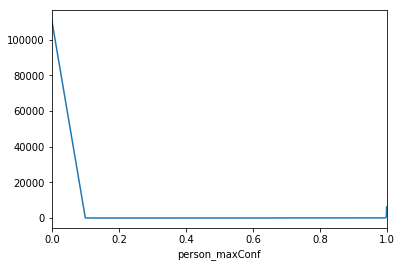

In [21]:
# df_ai_w_metadta['person_maxConf'].plot()

df_ai_w_metadta.groupby('person_maxConf').size().plot()

In [22]:
df_ai_w_metadta_nohuman = df_ai_w_metadta[
    (df_ai_w_metadta['person_maxConf'] < 0.5)]

In [23]:
df_ai_w_metadta_nohuman[df_ai_w_metadta_nohuman.FileName == 
                        'EDALC03ANH1_D1_RCNX1931.JPG' ]['Sequence']

84679    2 of 3
Name: Sequence, dtype: object

In [24]:
# df_ai_w_metadta_nohuman.head()

In [25]:
# df_ai_w_metadta[df_ai_w_metadta.Sequence == '1 of 3'].head()

In [26]:
df_ai_w_metadta.groupby('Sequence').size()

Sequence
1 of 3    17084
2 of 3    17082
3 of 3    17080
dtype: int64

In [27]:
df_ai_w_metadta_nohuman['Sequence'].unique()

array(['1 of 3', '2 of 3', '3 of 3', nan], dtype=object)

In [28]:
len(df_ai_w_metadta_nohuman)

113710

# Unique Directories

In [29]:
print(len(df_ai_w_metadta_nohuman['Directory'].unique()))

u = df_ai_w_metadta_nohuman['Directory'].unique()

u[0]

314


'/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#10 (MAY, 29, 2020 - AUG 03, 2020)'

In [30]:
done = []
total = 0

df_no_human_animal_vehicle_sequence = pd.DataFrame(columns=df_ai_w_metadta_nohuman.columns)

In [31]:
# df_ai_w_metadta_nohuman.head()

# d = df_ai_w_metadta_nohuman[df_ai_w_metadta_nohuman.FileName == 'EDALC03ANH1_D1_RCNX1924.JPG' ]['Directory'].tolist()

# df_hold = df_ai_w_metadta_nohuman[df_ai_w_metadta_nohuman['Directory'] == d[0]]
# df_hold.sort_values(by=['CreateDate', 'Sequence'], inplace=True)
# df_hold.reset_index(drop=True, inplace=True)
# max_index = max(df_hold.index)
# print('max index: ', max_index)
# min_index = min(df_hold.index)
# print('min index: ', min_index)



# # df_hold = df_hold[1860:1863]
# # max_index = 1862
# # min_index = 1860
# # print(len(df_hold))

# df_hold_2 = pd.DataFrame(columns=df_ai_w_metadta_nohuman.columns)

# for index, row in df_hold.iterrows():
#     # check if animal confidence is > 0.5 or vehicle confidence is > 0.5
#     if row['animal_maxConf'] > 0.5 or row['vehicle_maxConf'] > 0.5:
#         # check the sequence
#         if row['Sequence'] == '1 of 3':
#             df_hold_2 = df_hold_2.append(df_hold.loc[index])

#             # check index + 1 exists
#             if index+1 <= max_index:
#                 # make sure the next image is the next image in the sequence and numbering
# #                 print(df_hold.loc[index+2]['Sequence'])
#                 if df_hold.loc[index+1]['Sequence'] == '2 of 3' and df_hold.loc[index+1]['image_number'] == row['image_number'] + 1:
# #                     print('here')
#                     df_hold_2 = df_hold_2.append(df_hold.loc[index+1])

#             if index+2 <= max_index:
#                 if df_hold.loc[index+2]['Sequence'] == '3 of 3' and df_hold.loc[index+2]['image_number'] == row['image_number'] + 2:
#                     df_hold_2 = df_hold_2.append(df_hold.loc[index+2])
#         elif row['Sequence'] == '2 of 3':
#             if index-1 >= min_index:
#                 if df_hold.loc[index-1]['Sequence'] == '1 of 3' and df_hold.loc[index-1]['image_number'] == row['image_number'] - 1:
#                     df_hold_2 = df_hold_2.append(df_hold.loc[index-1])

#             df_hold_2 = df_hold_2.append(df_hold.loc[index])

#             if index+1 <= max_index:
#                 if df_hold.loc[index+1]['Sequence'] == '3 of 3' and df_hold.loc[index+1]['image_number'] == row['image_number'] + 1:
#                     df_hold_2 = df_hold_2.append(df_hold.loc[index+1])
#         elif row['Sequence'] == '3 of 3':
#             if index-2 >= min_index:
#                 if df_hold.loc[index-2]['Sequence'] == '1 of 3' and df_hold.loc[index-2]['image_number'] == row['image_number'] - 2:
#                     df_hold_2 = df_hold_2.append(df_hold.loc[index-2])

#             if index-1 >= min_index:
#                 if df_hold.loc[index-1]['Sequence'] == '2 of 3' and df_hold.loc[index-1]['image_number'] == row['image_number'] - 1:
#                     df_hold_2 = df_hold_2.append(df_hold.loc[index-1])

#             df_hold_2 = df_hold_2.append(df_hold.loc[index])
#         else:
#             df_hold_2 = df_hold_2.append(df_hold.loc[index])

# df_hold_2.drop_duplicates(inplace=True)
# df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold_2)


In [32]:
# print(df_hold[df_hold.FileName == 'EDALC03ANH1_D1_RCNX1930.JPG' ]['CreateDate'])

# print(df_hold[df_hold.FileName == 'EDALC03ANH1_D1_RCNX1931.JPG' ]['CreateDate'])

# df_hold[df_hold.FileName == 'EDALC03ANH1_D1_RCNX1932.JPG' ]['CreateDate']

# df_hold[1860:1863]['FileName']

In [33]:
for u in df_ai_w_metadta_nohuman['Directory'].unique():
    if u not in done:
        print(u)
        df_hold = df_ai_w_metadta_nohuman[df_ai_w_metadta_nohuman['Directory'] == u]
        df_hold.sort_values(by=['CreateDate', 'Sequence'], inplace=True)
        df_hold.reset_index(drop=True, inplace=True)
        max_index = max(df_hold.index)
        min_index = min(df_hold.index)
        print(len(df_hold))
        total+=len(df_hold)
        print('total: ', total)

        df_hold_2 = pd.DataFrame(columns=df_ai_w_metadta_nohuman.columns)

        for index, row in df_hold.iterrows():
            # check if animal confidence is > 0.5 or vehicle confidence is > 0.5
            if row['animal_maxConf'] > 0.5 or row['vehicle_maxConf'] > 0.5:
                # check the sequence
                if row['Sequence'] == '1 of 3':
                    df_hold_2 = df_hold_2.append(df_hold.loc[index])

                    # check index + 1 exists
                    if index+1 <= max_index:
                        # make sure the next image is the next image in the sequence and numbering
                        if df_hold.loc[index+1]['Sequence'] == '2 of 3' and df_hold.loc[index+1]['image_number'] == row['image_number'] + 1:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index+1])

                    if index+2 <= max_index:
                        if df_hold.loc[index+2]['Sequence'] == '3 of 3' and df_hold.loc[index+2]['image_number'] == row['image_number'] + 2:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index+2])
                elif row['Sequence'] == '2 of 3':
                    if index-1 >= min_index:
                        if df_hold.loc[index-1]['Sequence'] == '1 of 3' and df_hold.loc[index-1]['image_number'] == row['image_number'] - 1:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index-1])

                    df_hold_2 = df_hold_2.append(df_hold.loc[index])

                    if index+1 <= max_index:
                        if df_hold.loc[index+1]['Sequence'] == '3 of 3' and df_hold.loc[index+1]['image_number'] == row['image_number'] + 1:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index+1])
                elif row['Sequence'] == '3 of 3':
                    if index-2 >= min_index:
                        if df_hold.loc[index-2]['Sequence'] == '1 of 3' and df_hold.loc[index-2]['image_number'] == row['image_number'] - 2:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index-2])

                    if index-1 >= min_index:
                        if df_hold.loc[index-1]['Sequence'] == '2 of 3' and df_hold.loc[index-1]['image_number'] == row['image_number'] - 1:
                            df_hold_2 = df_hold_2.append(df_hold.loc[index-1])

                    df_hold_2 = df_hold_2.append(df_hold.loc[index])
                else:
                    df_hold_2 = df_hold_2.append(df_hold.loc[index])
                    
        df_hold_2.drop_duplicates(inplace=True)
        df_no_human_animal_vehicle_sequence = df_no_human_animal_vehicle_sequence.append(df_hold_2)

        done.append(u)


/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#10 (MAY, 29, 2020 - AUG 03, 2020)
125
total:  125


-c:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#4 (SEP 24, 2018 - DEC 19, 2018)/100MEDIA
282
total:  407
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#4 (SEP 24, 2018 - DEC 19, 2018)/101MEDIA
300
total:  707
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#4 (SEP 24, 2018 - DEC 19, 2018)/102MEDIA
299
total:  1006
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#4 (SEP 24, 2018 - DEC 19, 2018)/103MEDIA
297
total:  1303
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#4 (SEP 24, 2018 - DEC 19, 2018)/104MEDIA
1
total:  1304
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#5 (DEC 19, 2018 - MAR 28, 2019)/100MEDIA
300
total:  1604
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#5 (DEC 19, 2018 - MAR 28, 2019)/101MEDIA
300
total:  1904
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#5 (DEC 19, 2018 - MAR 28, 2019

/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#6 (MAR 28, 2019 - AUG 02, 2019)/152MEDIA
300
total:  19029
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#6 (MAR 28, 2019 - AUG 02, 2019)/153MEDIA
300
total:  19329
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#6 (MAR 28, 2019 - AUG 02, 2019)/154MEDIA
300
total:  19629
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#6 (MAR 28, 2019 - AUG 02, 2019)/155MEDIA
300
total:  19929
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#6 (MAR 28, 2019 - AUG 02, 2019)/156MEDIA
300
total:  20229
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#6 (MAR 28, 2019 - AUG 02, 2019)/157MEDIA
300
total:  20529
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#6 (MAR 28, 2019 - AUG 02, 2019)/158MEDIA
300
total:  20829
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#6 (MAR 28, 2019 - A

/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#3 (DEC 19, 2018 - MAR 28, 2019)/102MEDIA
300
total:  39116
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#3 (DEC 19, 2018 - MAR 28, 2019)/103MEDIA
300
total:  39416
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#3 (DEC 19, 2018 - MAR 28, 2019)/104MEDIA
59
total:  39475
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#4 (MAR 28, 2019 - AUG 02, 2019)/100MEDIA
300
total:  39775
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#4 (MAR 28, 2019 - AUG 02, 2019)/101MEDIA
300
total:  40075
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#4 (MAR 28, 2019 - AUG 02, 2019)/102MEDIA
300
total:  40375
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#4 (MAR 28, 2019 - AUG 02, 2019)/103MEDIA
300
total:  40675
/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH2 (Horse Hill 2)/SD#4 (MAR 28, 2019 - AU

/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#1 (MAY 15, 2018 - JUN 26, 2018)/108MEDIA
300
total:  74645
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#1 (MAY 15, 2018 - JUN 26, 2018)/109MEDIA
300
total:  74945
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#1 (MAY 15, 2018 - JUN 26, 2018)/110MEDIA
300
total:  75245
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#1 (MAY 15, 2018 - JUN 26, 2018)/111MEDIA
300
total:  75545
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#1 (MAY 15, 2018 - JUN 26, 2018)/112MEDIA
300
total:  75845
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#1 (MAY 15, 2018 - JUN 26, 2018)/113MEDIA
297
total:  76142
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#1 (MAY 15, 2018 - JUN 26, 2018)/114MEDIA
300
total:  76442
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Rivervie

/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#6 (MAR 27, 2019 - AUG 02, 2019)/118MEDIA
299
total:  88864
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#6 (MAR 27, 2019 - AUG 02, 2019)/119MEDIA
294
total:  89158
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#6 (MAR 27, 2019 - AUG 02, 2019)/120MEDIA
295
total:  89453
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#6 (MAR 27, 2019 - AUG 02, 2019)/121MEDIA
149
total:  89602
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#7 (AUG 02, 2019 - SEP 30, 2019)/100RECNX
77
total:  89679
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#7 (AUG 02, 2019 - SEP 30, 2019)/101RECNX
141
total:  89820
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/SD#8 (SEP 30, 2019 - DEC 17, 2019)
189
total:  90009
/mnt/wildlife/wildlifemontoringprogram/EDAL-C04-RIA1 (Riverview area 1)/

In [45]:
len(df_no_human_animal_vehicle_sequence)

54065

In [52]:
df_no_human_animal_vehicle_sequence[df_no_human_animal_vehicle_sequence['Sequence'].isna()]['SourceFile'].iloc[0]

'/mnt/wildlife/wildlifemontoringprogram/EDAL-A04-HOH1 (Horse hill 1)/SD#4 (SEP 24, 2018 - DEC 19, 2018)/100MEDIA/EDALA04HOH1_D4_100MEDIA_HUNT0005.JPG'

In [43]:
df_missing.iloc[0]

SourceFile         /mnt/wildlife/wildlifemontoringprogram/EDAL-D0...
ExifToolVersion                                                12.05
FileName                                 EDALD03RAP1_D1_RCNX0008.JPG
Directory          /mnt/wildlife/wildlifemontoringprogram/EDAL-D0...
FileSize                                                      316 kB
                                         ...                        
vehicle                                                            0
empty                                                              0
person_maxConf                                                     0
animal_maxConf                                                 0.985
vehicle_maxConf                                                    0
Name: 4, Length: 106, dtype: object

In [39]:
df_missing = df_no_human_animal_vehicle_sequence[df_no_human_animal_vehicle_sequence[
    'SourceFile'].str.contains('EDAL-D03-RAP1')]

In [40]:
df_missing[['file', 'FileName', 'Sequence']].to_csv('edal_d03_rap1.csv', index=False)

In [ ]:
df_no_human_animal_vehicle_sequence[['file', 'FileName', 
                'Sequence']].to_csv('images_to_transfer_to_nonhuman.csv', index=False)

In [ ]:
df_no_human_animal_vehicle_sequence.to_csv('no_human_animal_vehicle_sequence.csv', index=False)

In [ ]:
df_no_human_animal_vehicle_sequence[(df_no_human_animal_vehicle_sequence.vehicle_maxConf < 0.5) & 
                                   (df_no_human_animal_vehicle_sequence.animal_maxConf < 0.5)]